In [1]:
import pandas as pd
import os
import base64
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#key = os.environ['Toggl']

string=key+':api_token'
headers={
    'Authorization':'Basic '+base64.b64encode(string.encode('ascii')).decode('utf-8'),
    "Content-Type": "application/json"   
}

params = {
    'since':'2021-01-01',
    'until':'2021-12-31',
    'user_agent': 'm2edney@gmail.com',
    'workspace_id' : "3112792"
}

response = requests.get('https://api.track.toggl.com/reports/api/v2/details', headers = headers, params= params)
my_json = json.loads(response.content)
df = pd.DataFrame(my_json['data'])

In [2]:
page_count = int(my_json['total_count']/my_json['per_page']) + (my_json['total_count'] % my_json['per_page'] > 0)
for page in range(1, page_count):
    params['page']= str(page)
    response = requests.get('https://api.track.toggl.com/reports/api/v2/details', headers = headers, params= params)
    my_json = json.loads(response.content)
    df =pd.concat([df, pd.DataFrame(my_json['data'])])
    
df['dur'] = df['dur']/1000/60/60
df = df[~df['project'].isnull()]

<Axes: xlabel='project', ylabel='dur'>

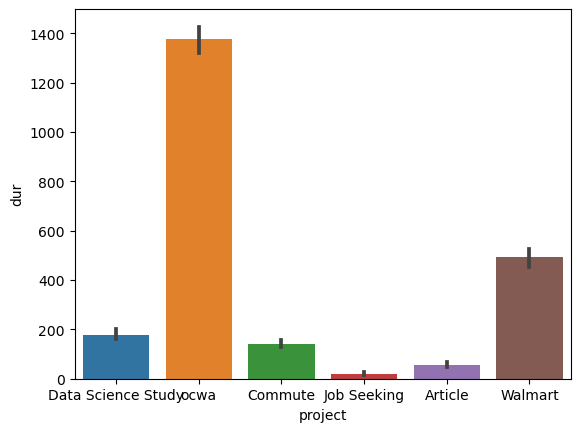

In [3]:
sns.barplot(x='project', y= 'dur', data = df, estimator = 'sum')

In [4]:
df['project'].unique()

array(['Data Science Study', 'ocwa', 'Commute', 'Job Seeking', 'Article',
       'Walmart'], dtype=object)